In [2]:
import numpy as np

In [14]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
A = []
X = np.array([2,4,5,8,9,11]).reshape(-1,1)
poly = PolynomialFeatures (degree = 2, include_bias= False)
X_poly = poly.fit_transform(X)

In [4]:
A = []

In [5]:
X = np.array([2,4,5,8,9,11]).reshape(-1,1)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)   

In [13]:
Y = np.array([1,2,4,4,7,9])
model = linear_model.LinearRegression()
model.fit(X_poly,Y)
model.coef_



array([0.18862751, 0.05037313])

In [24]:
A = np.zeros(shape=(6,3))

In [25]:
for i in range(6):
    for j in range(3):
        A[i,j] = X[i] **j
A


array([[  1.,   2.,   4.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  11., 121.]])

In [10]:
B = np.linalg.inv(A.T @ A)

In [11]:
B

array([[ 3.88776768e+00, -1.30147631e+00,  9.14179104e-02],
       [-1.30147631e+00,  4.90339066e-01, -3.63805970e-02],
       [ 9.14179104e-02, -3.63805970e-02,  2.79850746e-03]])

In [12]:
c = B @ A.T @ Y
c

array([0.66291369, 0.18862751, 0.05037313])

In [486]:
# giai cau b
U,S,Vt = np.linalg.svd(A,full_matrices= False)

In [487]:
U

array([[-0.02580286,  0.39881222,  0.82312306],
       [-0.10040828,  0.54175246,  0.05365909],
       [-0.1560392 ,  0.54413455, -0.18937784],
       [-0.39624486,  0.27492875, -0.35170841],
       [-0.50075104,  0.09307611, -0.21689186],
       [-0.74641983, -0.4088052 ,  0.33613135]])

In [488]:
S

array([162.76244475,   4.48950978,   0.48049977])

In [489]:
Vt

array([[-0.01183114, -0.10518871, -0.9943819 ],
       [ 0.32161616,  0.94120851, -0.10339045],
       [ 0.94679621, -0.32103251,  0.02269481]])

In [490]:
Vt.T @ np.diag(S**-1) @ U.T @ Y

array([0.66291369, 0.18862751, 0.05037313])

In [491]:
# giai cau c
def g(w):return 1/m * 2 * A.T @(A @ w -Y)

In [504]:
eta = 1e-4

In [505]:
k = 0
w = np.array([0,0,0])
m = len(X)

In [506]:
while k <1000:
    k+=1
    w = w - eta * g(w)
    e = np.linalg.norm(g(w))
    print(k,w,e)
    if e < 10**-4:
        print('*',k,w,e)
        break

1 [0.0009     0.00746667 0.06826667] 80.35943378983553
2 [0.00108242 0.00855375 0.07622665] 9.742633429250436
3 [0.00118086 0.00889461 0.07713402] 2.8090613422912165
4 [0.00126944 0.00914807 0.07721662] 2.5868397740158287
5 [0.00135682 0.00939115 0.07720278] 2.581956531071513
6 [0.001444   0.00963288 0.07717768] 2.5801792405092634
7 [0.00153111 0.00987431 0.07715128] 2.5784456328846743
8 [0.00161817 0.01011556 0.07712475] 2.5767137718056317
9 [0.00170517 0.01035665 0.07709821] 2.5749830825704585
10 [0.00179211 0.01059757 0.07707169] 2.573253556542972
11 [0.001879   0.01083832 0.07704519] 2.5715251928344505
12 [0.00196583 0.01107892 0.07701871] 2.569797990662731
13 [0.00205261 0.01131935 0.07699224] 2.5680719492476167
14 [0.00213933 0.01155962 0.07696579] 2.566347067809458
15 [0.002226   0.01179973 0.07693936] 2.5646233455691316
16 [0.00231261 0.01203968 0.07691295] 2.562900781748034
17 [0.00239916 0.01227946 0.07688656] 2.5611793755680883
18 [0.00248566 0.01251908 0.07686018] 2.5594591

In [366]:
x = 6
w[0] + w[1] *x + w[2] * x**2

6.80853425490988

In [367]:
#giai cau f
import matplotlib.pyplot as plt

In [368]:
X_grid = np.linspace(1,12,101)

In [369]:
Y_grid = [c @ np.array([1,x,x**2]) for x in X_grid]

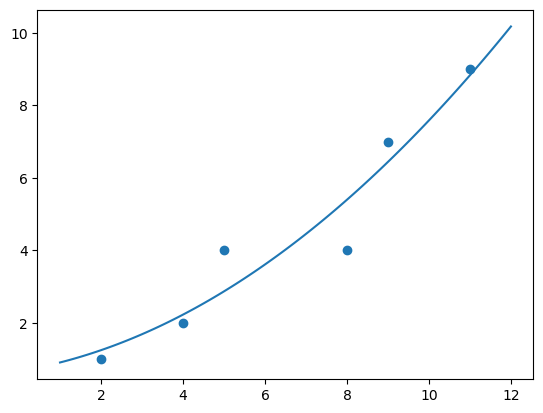

In [370]:
plt.plot(X_grid,Y_grid)
plt.scatter(X,Y)

In [508]:
X = np.array([[0,0],
               [1,1],
               [2,2]])

In [509]:
Y = np.array([0,1,2])

In [510]:
poly = PolynomialFeatures(degree =2, include_bias=False)

In [511]:
X_poly = poly.fit_transform(X)

In [512]:
model.fit(X_poly,Y)

LinearRegression()

In [513]:
model.coef_


array([ 5.00000000e-01,  5.00000000e-01, -8.45925913e-17, -8.45925913e-17,
       -8.45925913e-17])

In [514]:
A = np.concatenate((np.ones(shape=(len(X),1)),X),axis=1)

In [515]:
U,S,Vt = np.linalg.svd(A,full_matrices=False)

In [516]:
S_inv =np.diag([1/s if s>1e-10 else 0 for s in S])

In [517]:
Vt.T @ S_inv @ U.T @ Y

array([-5.55111512e-16,  5.00000000e-01,  5.00000000e-01])

In [518]:
def g(w): return 1/m * 2 * A.T @ (A @ w -Y)

In [519]:
eta = 1e-5
m = len (X)

In [520]:
k = 0

In [521]:
w = np.array([0,0,0])

In [419]:
while k < 100_000:
    k+=1
    w = w - eta * g(w)
    e = np.linalg.norm(g(w))
    print ('*', k ,w ,e )
    if e < 1e-5:
        break

* 15899 [0.002      0.00333333 0.00333333] 5.079855796534016
* 15900 [0.00398267 0.00664044 0.00664044] 5.039275415082155
* 15901 [0.00594814 0.00992154 0.00992154] 4.999020068929597
* 15902 [0.00789656 0.01317684 0.01317684] 4.959087160415318
* 15903 [0.00982806 0.01640653 0.01640653] 4.919474112676884
* 15904 [0.01174277 0.01961083 0.01961083] 4.880178369484162
* 15905 [0.01364085 0.02278994 0.02278994] 4.84119739507438
* 15906 [0.0155224  0.02594406 0.02594406] 4.802528673988492
* 15907 [0.01738758 0.02907339 0.02907339] 4.764169710908862
* 15908 [0.01923651 0.03217812 0.03217812] 4.726118030498245
* 15909 [0.02106933 0.03525846 0.03525846] 4.688371177240054
* 15910 [0.02288616 0.0383146  0.0383146 ] 4.650926715279911
* 15911 [0.02468713 0.04134673 0.04134673] 4.613782228268458
* 15912 [0.02647236 0.04435504 0.04435504] 4.576935319205438
* 15913 [0.028242   0.04733973 0.04733973] 4.540383610285005
* 15914 [0.02999616 0.05030098 0.05030098] 4.5041247427423
* 15915 [0.03173496 0.05323

In [ ]:
from sklearn.proprcessing import PolynomialFeatures 

In [ ]:
X = np array reshape 
Y = 
poly = PolynomialFeature(degree = , include_bias = False )
X_poly = poly.fit_transfrom(X)
model = linear_model.LinearRegression()
model.fit(X)